In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from rflearn.env import WindGridWorld
from rflearn.algo import MCEpsilonSoft
from rflearn.utils import zero_values, random_policy

# Windy Grid World

In [2]:
env = WindGridWorld()
values = zero_values(env)
policy = random_policy(env)

agent = MCEpsilonSoft(env, values, policy, pbar_leave=True)
agent.fit(gamma=1, epsilon=0.1, lam=0.05, kbatch=30)

In [3]:
env

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
----------
[0, 0, 0, 1, 1, 1, 2, 2, 1, 0]

In [6]:
print(np.array(env.S).reshape(env.shape))

[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69]]


In [3]:
agent.transform(1800)

100%|██████████| 1800/1800 [00:59<00:00, 30.26it/s]


In [4]:
q_vals = pd.Series(agent.qvalue).unstack()[env.A]
pi_vals = pd.DataFrame(agent.policy, index=agent.env.S, columns=agent.env.A)
v_vals = (q_vals * pi_vals).sum(1)
np.round(v_vals.values.reshape(env.shape)/10)

array([[-12., -13.,  -2.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
       [-12., -11.,  -2.,  -1.,  -9.,  -1.,  -3.,  -9.,  -1.,  -1.],
       [ -3.,  -3.,  -2.,  -2.,  -1.,  -2., -20.,  -4.,  -1.,  -1.],
       [ -2.,  -2.,  -2.,  -1.,  -5., -24.,  -5.,   0.,  -1.,  -0.],
       [ -2.,  -2.,  -2.,  -2., -32., -20.,   0.,  -3.,  -0.,  -0.],
       [ -2.,  -2.,  -6., -27., -19.,   0.,   0.,  -5.,  -5.,  -1.],
       [ -4.,  -6., -31., -29.,   0.,   0.,   0.,   0.,  -3.,  -6.]])

In [31]:
pol = {}
for k, v in pd.Series(agent.qvalue).unstack().iterrows():
    pol[k] = v.index[v.argmax()][0]

In [38]:
pd.Series(pol).sort_index().values.reshape(env.shape)

array([['r', 'd', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'd'],
       ['u', 'r', 'r', 'r', 'r', 'r', 'l', 'r', 'r', 'd'],
       ['d', 'd', 'u', 'l', 'r', 'd', 'd', 'r', 'u', 'd'],
       ['r', 'r', 'r', 'r', 'r', 'r', 'd', 'd', 'u', 'd'],
       ['r', 'u', 'u', 'l', 'l', 'u', 'd', 'd', 'l', 'l'],
       ['r', 'u', 'u', 'd', 'u', 'd', 'd', 'u', 'd', 'u'],
       ['u', 'l', 'l', 'r', 'd', 'd', 'd', 'd', 'd', 'd']], dtype=object)

In [39]:
env.wind

[0, 0, 0, 1, 1, 1, 2, 2, 1, 0]

In [7]:
agent.hist['avg_r'][-10:]

[-17.833333333333332,
 -18.133333333333333,
 -17.466666666666665,
 -16.9,
 -16.966666666666665,
 -16.9,
 -17.233333333333334,
 -18.1,
 -17.7,
 -17.7]

<AxesSubplot:>

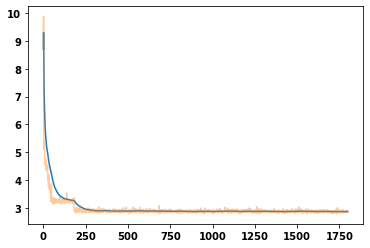

In [41]:
loss = np.log(-1 * pd.Series(agent.hist['avg_r']))

loss.ewm(halflife=25).mean().plot()
loss.plot(alpha=0.4)
# plt.axhline(0, linestyle='--', color='grey',linewidth=1)